### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import pandas as pd
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(columns="EIN")
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# D3 - Look at STATUS and SPECIAL_CONSIDERATIONS columns value counts (low information columns)
print(application_df["STATUS"].value_counts())
print(application_df["SPECIAL_CONSIDERATIONS"].value_counts())

1    34294
0        5
Name: STATUS, dtype: int64
N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64


In [6]:
# Drop both columns
application_df = application_df.drop(columns=["STATUS","SPECIAL_CONSIDERATIONS"])
application_df.nunique()

NAME                19568
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df["APPLICATION_TYPE"].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

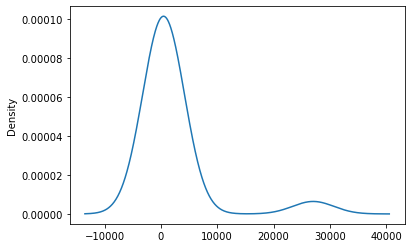

In [8]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [9]:
# Determine which application types to replace if value counts are less than 100
replace_application = list(app_type_count[app_type_count < 700].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df["CLASSIFICATION"].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

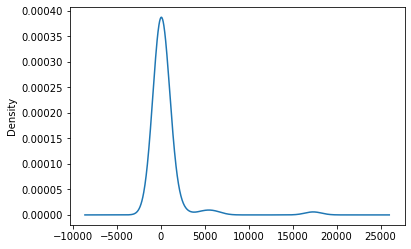

In [11]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [12]:
# Determine which values to replace if counts are less than 1250
replace_class = list(classification_count[classification_count < 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# D3 - binning names!
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

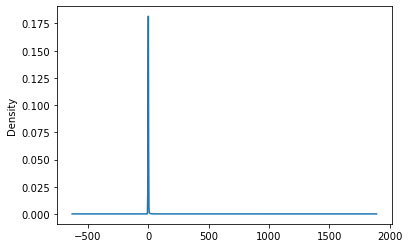

In [14]:
# Visualize value counts for "NAME"
name_counts.plot.density()

In [16]:
# How many names appear less than 5 times in the dataset
name_counts[name_counts <= 5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [17]:
# Bin the names that appear 5 times or less in name_counts
# get index name of names appearing less than 5 times
replace_name = list(name_counts[name_counts <= 5].index)

# replace them in the dataframe
for name in replace_name:
    application_df["NAME"] = application_df["NAME"].replace(name, "Other")

# Check binning
application_df["NAME"].value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [18]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\halov\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

C:\Users\halov\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = round(num_input_features * 2.25)
hidden_nodes_layer2 = round(num_input_features * 1.5)
hidden_nodes_layer3 = num_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=num_input_features,
                            activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 886)               349970    
                                                                 
 dense_1 (Dense)             (None, 591)               524217    
                                                                 
 dense_2 (Dense)             (None, 394)               233248    
                                                                 
 dense_3 (Dense)             (None, 1)                 395       
                                                                 
Total params: 1,107,830
Trainable params: 1,107,830
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Create callback that saves the model every 5th epoch
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/opt_weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150, callbacks=[cp_callback])

Epoch 1/150
804/804 [==============================] - 4s 4ms/step - loss: 0.4792 - accuracy: 0.7677
Epoch 2/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4364 - accuracy: 0.7920
Epoch 3/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4315 - accuracy: 0.7922
Epoch 4/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4297 - accuracy: 0.7942
Epoch 5/150
794/804 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7955
Epoch 5: saving model to checkpoints\opt_weights.05.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4274 - accuracy: 0.7947
Epoch 6/150
804/804 [==============================] - 4s 4ms/step - loss: 0.4280 - accuracy: 0.7937
Epoch 7/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4259 - accuracy: 0.7963
Epoch 8/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4262 - accuracy: 0.7956
Epoch 9/150
804/804 [=============================

Epoch 126/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4002 - accuracy: 0.8078
Epoch 127/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4004 - accuracy: 0.8082
Epoch 128/150
804/804 [==============================] - 3s 4ms/step - loss: 0.3994 - accuracy: 0.8086
Epoch 129/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4005 - accuracy: 0.8075
Epoch 130/150
793/804 [============================>.] - ETA: 0s - loss: 0.4003 - accuracy: 0.8081
Epoch 130: saving model to checkpoints\opt_weights.130.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.4000 - accuracy: 0.8083
Epoch 131/150
804/804 [==============================] - 3s 4ms/step - loss: 0.4013 - accuracy: 0.8078
Epoch 132/150
804/804 [==============================] - 3s 4ms/step - loss: 0.3999 - accuracy: 0.8084
Epoch 133/150
804/804 [==============================] - 3s 4ms/step - loss: 0.3999 - accuracy: 0.8087
Epoch 134/150
804/804 [========

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4782 - accuracy: 0.7862 - 498ms/epoch - 2ms/step
Loss: 0.47818872332572937, Accuracy: 0.7862390875816345


In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

<AxesSubplot:>

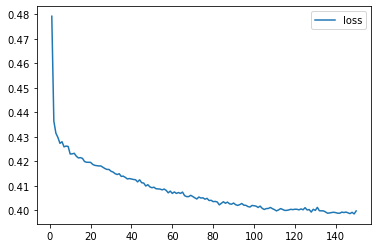

In [44]:
# Plot loss
history_df.plot(y="loss")

<AxesSubplot:>

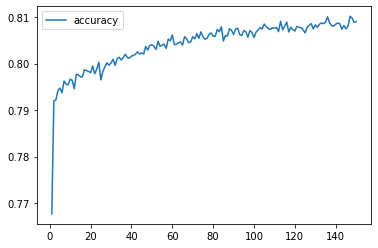

In [45]:
# Plot accuracy
history_df.plot(y="accuracy")

In [ ]:
# Save nn model
nn.save("Trained_Models/AlphabetSoupCharity_D3.h5")

In [ ]:
# Import the model and check for exact prior results
nn_imported = tf.keras.models.load_model("Trained_Models/AlphabetSoupCharity_D3.h5")
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## Comparing RandomForest

In [30]:
# import dependencies
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Create random forest classifier
rf = RandomForestClassifier(n_estimators=128, random_state=42)

# fit the model
rf = rf.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf.predict(X_test_scaled)
print(f'Random Forest model accuracy: {accuracy_score(y_test,y_pred):.3f}')

Random Forest model accuracy: 0.772


In [33]:
# Create basic confusion matrix to display results
cm = confusion_matrix(y_test, y_pred)
cm

array([[2762, 1248],
       [ 707, 3858]], dtype=int64)

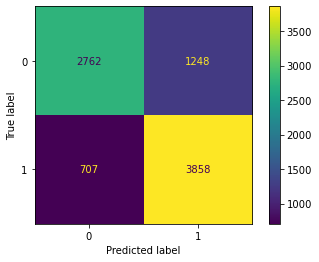

In [34]:
# Chart the results in a neat format
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
cm_disp.plot()

In [35]:
# Print out classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      4010
           1       0.76      0.85      0.80      4565

    accuracy                           0.77      8575
   macro avg       0.78      0.77      0.77      8575
weighted avg       0.77      0.77      0.77      8575



In [42]:
# Get feature importances
importances = rf.feature_importances_

# Get column names
cols = application_df.drop(columns="IS_SUCCESSFUL").columns

rf_important_df = pd.DataFrame({"feature":cols, "importance":importances}).sort_values("importance", ascending=False)
rf_important_df.head(10)

,feature,importance
0,ASK_AMT,0.272322
238,NAME_Other,0.072928
364,AFFILIATION_CompanySponsored,0.070203
366,AFFILIATION_Independent,0.052194
381,ORGANIZATION_Association,0.017294
309,NAME_TOASTMASTERS INTERNATIONAL,0.016837
360,APPLICATION_TYPE_T5,0.015912
384,ORGANIZATION_Trust,0.014590
310,NAME_TOPS CLUB INC,0.013618
356,APPLICATION_TYPE_Other,0.013122
